In [1]:
import requests
import pandas as pd
import numpy as np
from pathlib import Path
import ianimal_dl
import importlib
importlib.reload(ianimal_dl)
from ianimal_dl import *

response = requests.get(
    url = "https://ianimal.pro/api/v1/species/", 
    params = {"skip": 0, "limit": 100},
    headers={ "accept": "application/json" })

data = response.json()

In [5]:
peaks = pd.read_csv("data/Bos_taurus/Bos_taurus_peak_list.gz", sep  = "\t") 

/tmp/ipykernel_26984/759746090.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  peaks = pd.read_csv("data/Bos_taurus/Bos_taurus_peak_list.gz", sep  = "\t")


In [6]:
peaks.sample_id.value_counts()

sample_id
BTAS04001026000001    663143
BTAS04001026000005    543659
BTAS04001024000011    485374
BTAS04001024000014    482268
BTAS04001031000002    443309
                       ...  
BTAS03003025000006     15437
BTAS03003025000005     14844
BTAS03003025000001     13894
BTAS03002009000004      6189
BTAS03002009000006      4097
Name: count, Length: 89, dtype: int64

In [12]:
def get_sample_meta(species_id, sample_name): 
    url = f"https://ianimal.pro/api/v1/epigenome/sample/{species_id}/{sample_name}"
    response = requests.get(
        url = url, 
        params = {"skip": 0, "limit": 100},
        headers={ "accept": "application/json" })

    if response.status_code != 200: 
        print(f"Warning: couldn't retrieve {url}")
        return None

    return response.json()

get_sample_meta("2","BTAS04001026000001")

{'sample id': 'BTAS04001026000001',
 'targat': 'ATAC',
 'tissue ontology': 'embryo',
 'tissue': 'Embryo',
 'NSC value': 1.139798,
 'RSC value': 0.809732,
 'peak number': 1326286,
 'peak length': 123,
 'project': 'PRJNA595394'}

In [51]:
# run after running ianimal_dl. Maybe should keep Gallus_gallus, there is some other data for it
import shutil
for dir_path in Path("data").iterdir():
    # Check if it's a directory
    if dir_path.is_dir():
        # Count files in the directory
        file_count = len(list(dir_path.glob('*')))  # Count all files and directories

        # Delete species with fewer than 3 assays
        if file_count < 3:
            print(f"Deleting directory: {dir_path}")
            shutil.rmtree(dir_path)

Deleting directory: data/Anser_cygnoides
Deleting directory: data/Anas_platyrhynchos
Deleting directory: data/.ipynb_checkpoints
Deleting directory: data/Equus_asinus
Deleting directory: data/Gallus_gallus
Deleting directory: data/Equus_caballus


In [20]:
data_dict = { g['full_name']:g for g in data }
data_dict['Anas platyrhynchos']

{'nickname': None,
 'description': None,
 'id': '16',
 'full_name': 'Anas platyrhynchos',
 'abbreviation': 'APL',
 'genome_size': '1.2 Gb',
 'reference_sequence': 'GCA_008746955.1(ASM874695v1)'}

In [8]:
data_dict['Gallus gallus']

{'nickname': None,
 'description': None,
 'id': '15',
 'full_name': 'Gallus gallus',
 'abbreviation': 'GGA',
 'genome_size': '1.1 Gb',
 'reference_sequence': 'GCA_000002315.5(GRCg6a)'}

In [10]:
data[15]

{'nickname': None,
 'description': None,
 'id': '16',
 'full_name': 'Anas platyrhynchos',
 'abbreviation': 'APL',
 'genome_size': '1.2 Gb',
 'reference_sequence': 'GCA_008746955.1(ASM874695v1)'}

In [5]:
common_names = \
"""Wild boar
Cattle
Sheep
Horse
Goat
Donkey
Blue whale
House mouse
Rhesus macaque
Domestic dog
Domestic cat
Dromedary camel
African elephant
Asian black bear
Chicken
Mallard duck
Swan goose
European rabbit
Giant panda
Lion
Tiger""".split("\n")

In [8]:
for i in range(len(data)): 
    data[i]["nickname"] = common_names[i]

In [ ]:
print(data)

In [47]:
data_i = 15
species_id = data[data_i]['id']
species_name = data[data_i]['full_name'].replace(' ', '_')
species_id, species_name

('16', 'Anas_platyrhynchos')

In [43]:
species_dir = Path("data") / species_name
species_dir.mkdir(exist_ok = True)
filename = species_dir / f"{species_name}_peak_list.gz"

In [11]:
response = requests.get(
    url = f"https://direct.ianimal.pro/gz/Omics_Data/{species_name}/{species_name}_peak_list.gz")

if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"File '{filename}' downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")
    species_dir.rmdir()
    # continue

File 'Sus_scrofa_peak_list.gz' downloaded successfully.


In [44]:
peaks = pd.read_csv(filename, sep = "\t", dtype={'chrom': str})
peaks

,chrom,start,end,sample_id,fold_change,-log10pvalue,-log10qvalue,gene_id,gene_name
0,1,20178,20477,GGAS04001054000001,1.53425,4.71322,3.50481,-,-
1,1,21072,21436,GGAS04001054000001,2.44117,25.55540,23.87710,-,-
2,1,21650,22923,GGAS04001054000001,2.60893,38.80710,36.98660,-,-
3,1,23177,23868,GGAS04001054000001,2.64487,44.02240,42.15490,-,-
4,1,27003,27466,GGAS04001054000001,3.88458,142.45200,140.04000,ENSGALG00000045540,CLEC2D
...,...,...,...,...,...,...,...,...,...
14336665,Z,41844666,41845022,GGAS03010054000006,3.23711,4.67149,1.47409,ENSGALG00000012620,PTCH1
14336666,Z,44368624,44368880,GGAS03010054000006,3.26589,5.48784,2.06709,ENSGALG00000015209,NFIL3
14336667,Z,44370257,44370598,GGAS03010054000006,3.11189,4.46249,1.36322,ENSGALG00000015209,NFIL3
14336668,Z,73209981,73210365,GGAS03010054000006,3.02395,4.54461,1.42365,ENSGALG00000027140,MARVELD2


In [48]:
# only keep confident peaks
peaks = peaks[ peaks["-log10qvalue"] > -np.log10(0.01) ]

# filter excessively long or short peaks
peak_len = peaks.end - peaks.start
peaks = peaks[ (peak_len <= 5000) & (peak_len >= 50) ]

# remove samples with <10000 peaks
peak_counts = peaks.sample_id.value_counts()
to_keep = peak_counts.index[peak_counts >= 1e4]
peaks = peaks[peaks.sample_id.isin(to_keep)]

meta_list = [ get_sample_meta(species_id, sample_name) for sample_name in peak_counts.index ]
meta_list = list(filter(None, meta_list))
sample_meta = pd.DataFrame(
    meta_list, 
    index = peak_counts.index)

sample_meta.rename(columns={'targat': 'target'}, inplace=True)

target_tissue_combos = sample_meta[ ["target", "tissue"] ].drop_duplicates() 

for row in target_tissue_combos.iterrows(): 
    try: 
        print(row)
        row = row[1]
        to_merge = sample_meta[(sample_meta.tissue == row.tissue) & (sample_meta.target == row.target)]
        peaks_to_merge = peaks[peaks.sample_id.isin(to_merge.index)]
        if len(peaks_to_merge) < 10000: 
            continue
        merged = merge_intervals(peaks_to_merge)
        merged.to_csv(species_dir / f"{row.tissue}_{row.target}.bed.gz", sep='\t', index=False, header=False)
    except: 
        print(f"Warning: failed to merge tissue {row.tissue} target {row.target} for {species_name}")
        

KeyError: "None of [Index(['target', 'tissue'], dtype='object')] are in the [columns]"

In [49]:
sample_meta

""
sample_id
GGAS04001026000016
GGAS04001026000013
GGAS04001026000014
GGAS04001026000004
GGAS04001026000017
...
GGAS03004024000001
GGAS03004036000001
GGAS03004036000002


1

In [32]:
peak_counts

sample_id
APLS04001044000001    235689
APLS04001041000001    223744
Name: count, dtype: int64

In [183]:
row[1].target

'ATAC'

In [103]:
to_merge = sample_meta[(sample_meta.tissue == "alveolar macrophages") & (sample_meta.targat == "H3K27me3")]
to_merge

,targat,tissue ontology,tissue,peak number,peak length
sample_id,,,,,
SSCS03004021000014,H3K27me3,macrophage,alveolar macrophages,470160,721
SSCS03004021000011,H3K27me3,macrophage,alveolar macrophages,467506,660
SSCS03004021000002,H3K27me3,macrophage,alveolar macrophages,454342,699
SSCS03004021000010,H3K27me3,macrophage,alveolar macrophages,453502,783
SSCS03004021000007,H3K27me3,macrophage,alveolar macrophages,447940,734
SSCS03004021000004,H3K27me3,macrophage,alveolar macrophages,443622,719
SSCS03004021000005,H3K27me3,macrophage,alveolar macrophages,438642,671
SSCS03004021000009,H3K27me3,macrophage,alveolar macrophages,425766,760
SSCS03004021000003,H3K27me3,macrophage,alveolar macrophages,416142,698


In [108]:
to_merge = sample_meta[(sample_meta.tissue == "alveolar macrophages") & (sample_meta.targat == "H3K27me3")]

peaks_to_merge = peaks[peaks.sample_id.isin(to_merge.index)]

/tmp/ipykernel_34534/3416363197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5165.0

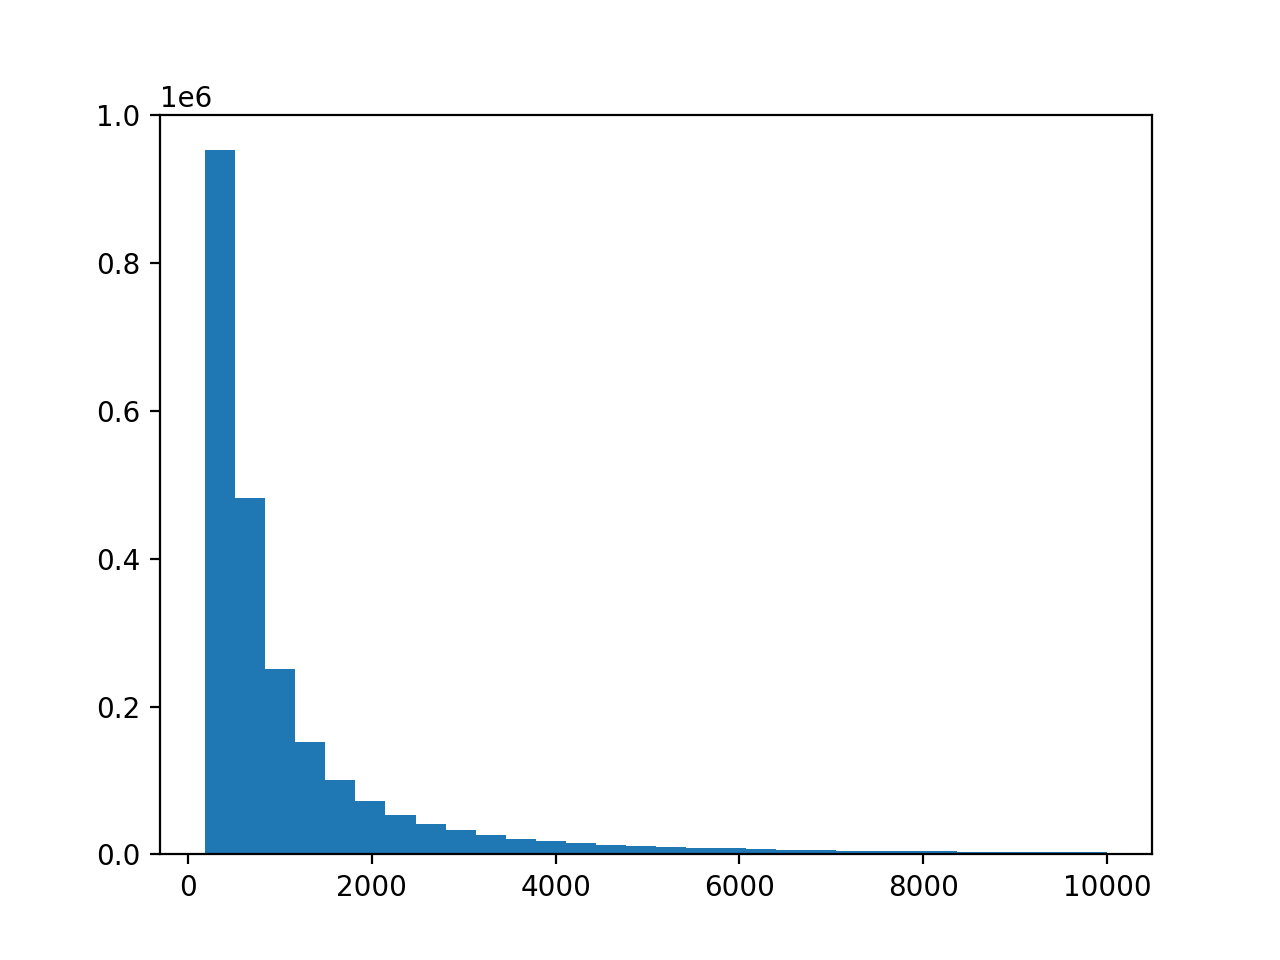

In [130]:
d = peaks_to_merge.end - peaks_to_merge.start
_ = plt.hist(d[d<10000], 30)
np.percentile(d, 95)

sample_id
SSCS04001034000004    524007
SSCS04001034000014    494510
SSCS04001040000001    462713
SSCS04001022000012    415218
SSCS04001040000002    412996
                       ...  
SSCS03179052000001      2761
SSCS03178052000001      2499
SSCS03010026000001      2120
SSCS03004026000001      2083
SSCS03004054000001      1388
Name: count, Length: 437, dtype: int64

Index(['SSCS04001034000004', 'SSCS04001034000014', 'SSCS04001040000001',
       'SSCS04001022000012', 'SSCS04001040000002', 'SSCS04001022000006',
       'SSCS04001023000003', 'SSCS04001031000002', 'SSCS04001031000001',
       'SSCS04001032000001',
       ...
       'SSCS03003025000021', 'SSCS03003034000004', 'SSCS03003025000018',
       'SSCS03003025000024', 'SSCS03003025000049', 'SSCS03003025000033',
       'SSCS03005054000001', 'SSCS03003012000001', 'SSCS03004054000002',
       'SSCS03178026000001'],
      dtype='object', name='sample_id', length=421)

In [149]:
peaks

,chrom,start,end,sample_id,fold_change,-log10pvalue,-log10qvalue,gene_id,gene_name
0,1,21360,22267,SSCS03003025000001,31.66750,198.82300,195.28400,ENSSSCG00000037372;ENSSSCG00000027257,TBP;PSMB1
1,1,22348,24865,SSCS03003025000001,26.27320,176.78400,173.49900,ENSSSCG00000037372;ENSSSCG00000027257,TBP;PSMB1
2,1,185771,187621,SSCS03003025000001,42.13330,239.23100,235.04200,ENSSSCG00000029697,FAM120B
3,1,193763,194968,SSCS03003025000001,43.98650,168.72800,165.52200,-,-
4,1,198348,201351,SSCS03003025000001,27.01640,117.95600,115.16500,ENSSSCG00000027726,DLL1
...,...,...,...,...,...,...,...,...,...
53119312,Y,43488052,43488223,SSCS04001054000012,2.79627,5.30111,2.51883,-,-
53119315,Y,43495660,43495810,SSCS04001054000012,3.02548,5.51748,2.63843,-,-
53119318,Y,43510757,43510935,SSCS04001054000012,3.06407,6.19934,3.15626,-,-
53119319,Y,43519232,43519416,SSCS04001054000012,2.90076,5.21552,2.45340,-,-


(array([ 1.,  0.,  3.,  1.,  1.,  2.,  3.,  3.,  1.,  1.,  2.,  1.,  6.,
        14., 55., 33.,  9., 21., 26., 24., 42., 41., 40., 15., 47., 16.,
        13.,  5.,  8.,  3.]),
 array([3.14238947, 3.22828772, 3.31418597, 3.40008423, 3.48598248,
        3.57188074, 3.65777899, 3.74367724, 3.8295755 , 3.91547375,
        4.00137201, 4.08727026, 4.17316852, 4.25906677, 4.34496502,
        4.43086328, 4.51676153, 4.60265979, 4.68855804, 4.77445629,
        4.86035455, 4.9462528 , 5.03215106, 5.11804931, 5.20394756,
        5.28984582, 5.37574407, 5.46164233, 5.54754058, 5.63343883,
        5.71933709]),
 <BarContainer object of 30 artists>)

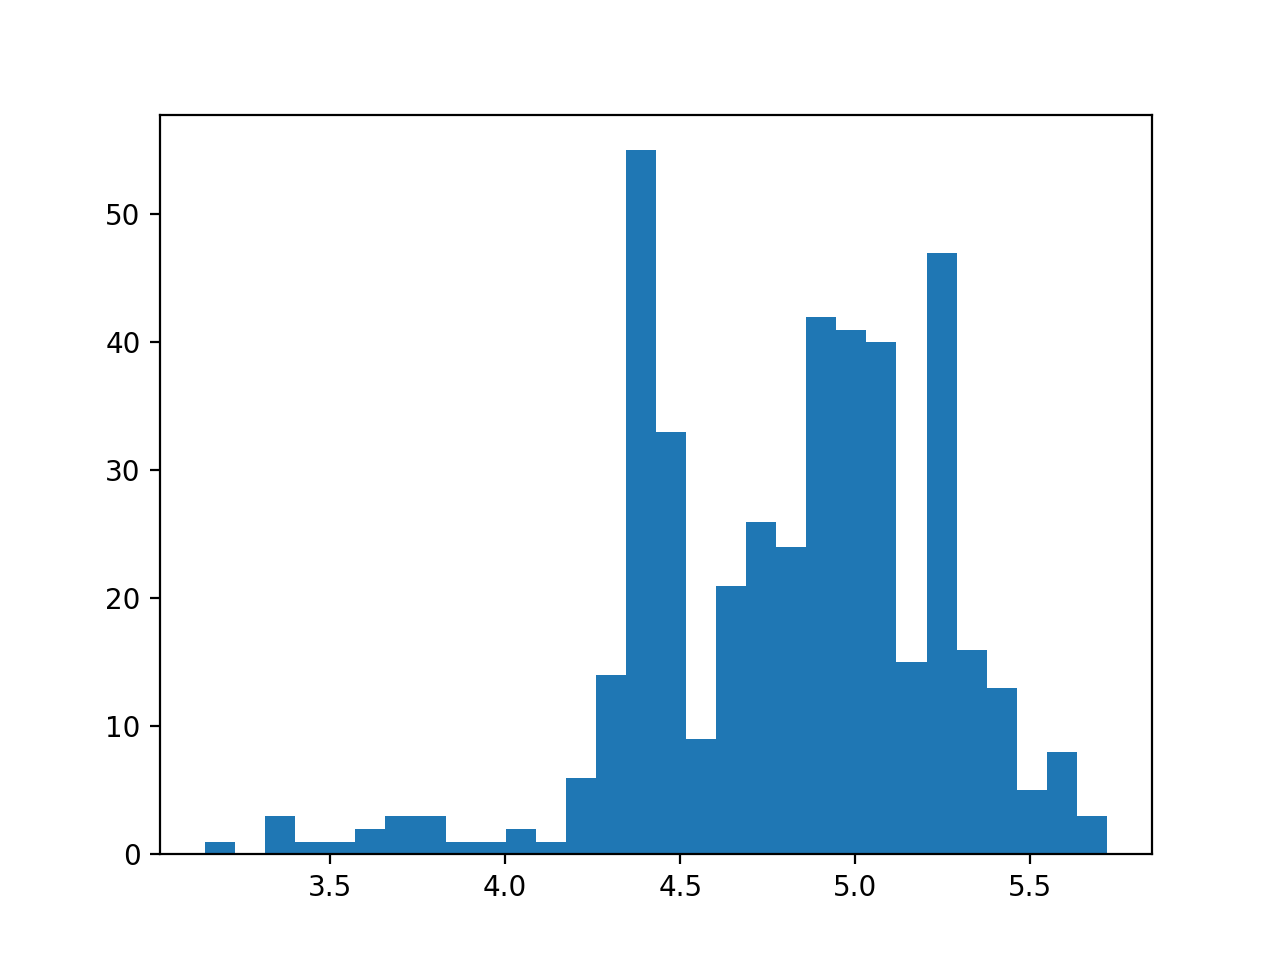

In [144]:
plt.hist(np.log10(peak_counts), 30)

In [145]:
10**4.5

31622.776601683792

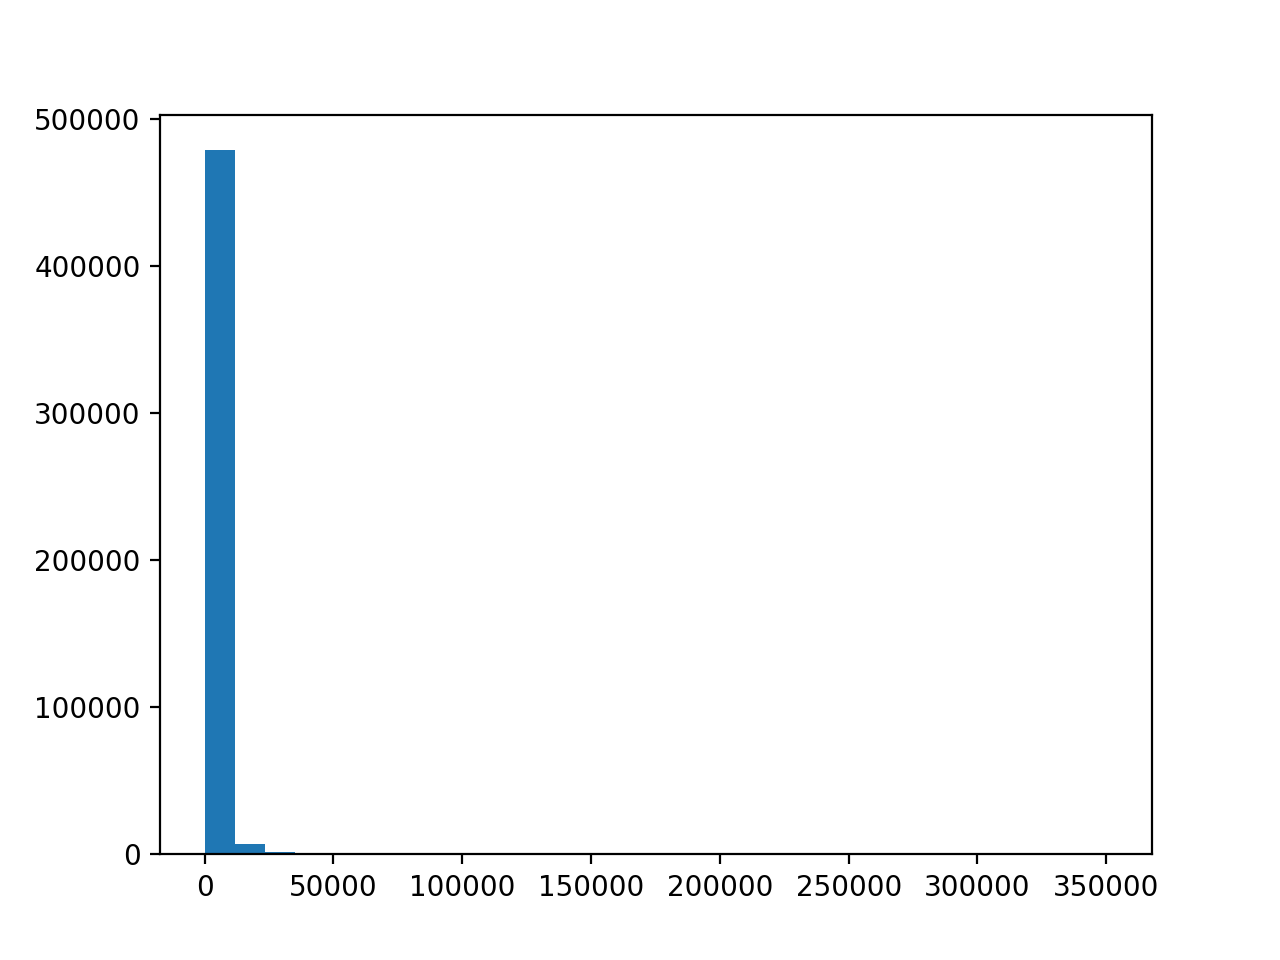

In [123]:
_ = plt.hist(merged.end - merged.start, 30)

In [112]:
intervals = peaks_to_merge

IndexError: tuple index out of range

,targat,tissue
sample_id,,
SSCS04001034000004,ATAC,cerebellum
SSCS04001040000001,ATAC,adipose
SSCS04001022000006,ATAC,
SSCS04001022000012,ATAC,lung
SSCS04001031000001,ATAC,hypothalamus
...,...,...
SSCS03004025000005,H3K27me3,colon
SSCS03138026000001,EGR1,iPAM cells
SSCS03178052000001,FLAG,stem cells


('SSCS04001034000004', targat          ATAC
tissue    cerebellum
Name: SSCS04001034000004, dtype: object)
('SSCS04001040000001', targat       ATAC
tissue    adipose
Name: SSCS04001040000001, dtype: object)
('SSCS04001022000006', targat    ATAC
tissue        
Name: SSCS04001022000006, dtype: object)
('SSCS04001022000012', targat    ATAC
tissue    lung
Name: SSCS04001022000012, dtype: object)
('SSCS04001031000001', targat            ATAC
tissue    hypothalamus
Name: SSCS04001031000001, dtype: object)
('SSCS04001023000003', targat      ATAC
tissue    Kidney
Name: SSCS04001023000003, dtype: object)
('SSCS04001032000001', targat               ATAC
tissue    cerebral cortex
Name: SSCS04001032000001, dtype: object)
('SSCS04001012000030', targat               ATAC
tissue    hindlimb muscle
Name: SSCS04001012000030, dtype: object)
('SSCS04001025000010', targat     ATAC
tissue    liver
Name: SSCS04001025000010, dtype: object)
('SSCS04001054000008', targat    ATAC
tissue    skin
Name: SSCS0400105

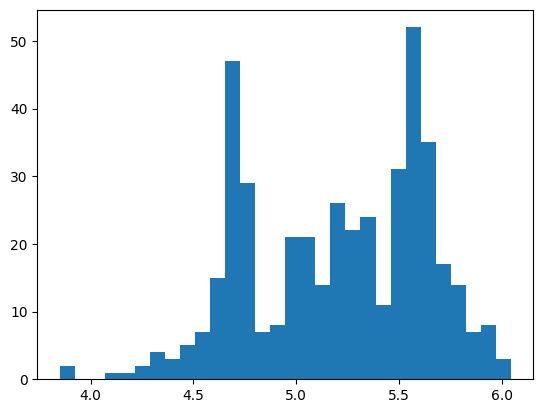

In [80]:
plt.hist(np.log10(sample_meta["peak number"]),30)
plt.show()

In [81]:
10**5.5

316227.7660168379

In [85]:
sample_meta

,targat,tissue ontology,tissue,peak number,peak length
sample_id,,,,,
SSCS04001034000004,ATAC,cerebellum,cerebellum,1105486,124
SSCS04001034000014,ATAC,cerebellum,cerebellum,1037192,129
SSCS04001040000001,ATAC,adipose,adipose,973442,126
SSCS04001022000006,ATAC,lung,,916022,132
SSCS04001040000002,ATAC,adipose,adipose,894154,122
...,...,...,...,...,...
SSCS03138026000001,EGR1,embryo,iPAM cells,17090,326
SSCS03178052000001,FLAG,stem cell,stem cells,15832,254
SSCS03004054000001,H3K27me3,nasopharynx,esophagus,12622,318


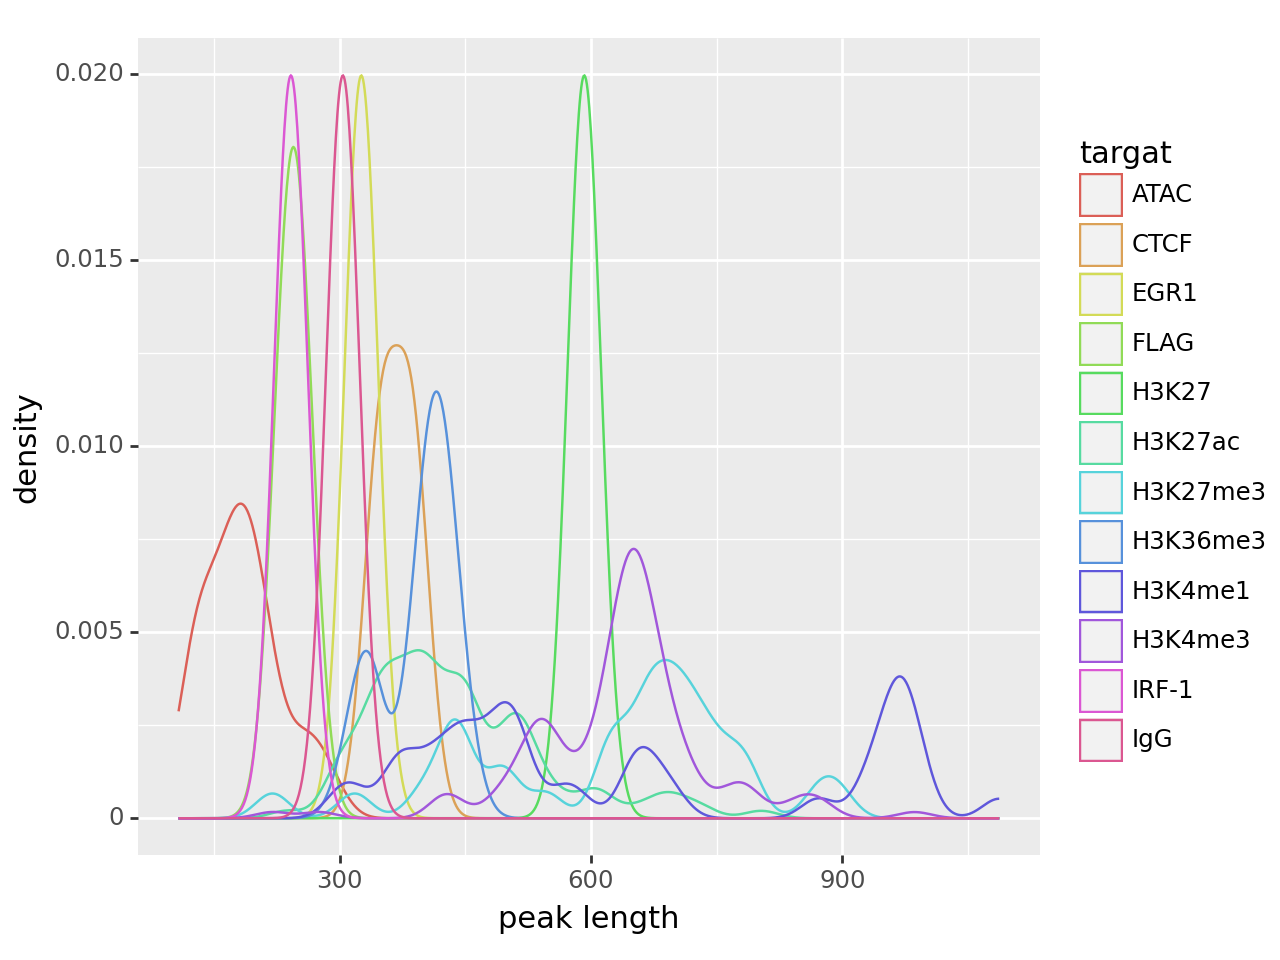

<Figure Size: (640 x 480)>

In [95]:
import plotnine as p9 # this is only the average so not very interesting
p9.ggplot(sample_meta, p9.aes(x = "peak length", color = "targat")) + p9.geom_density(fill = None, bw=20)

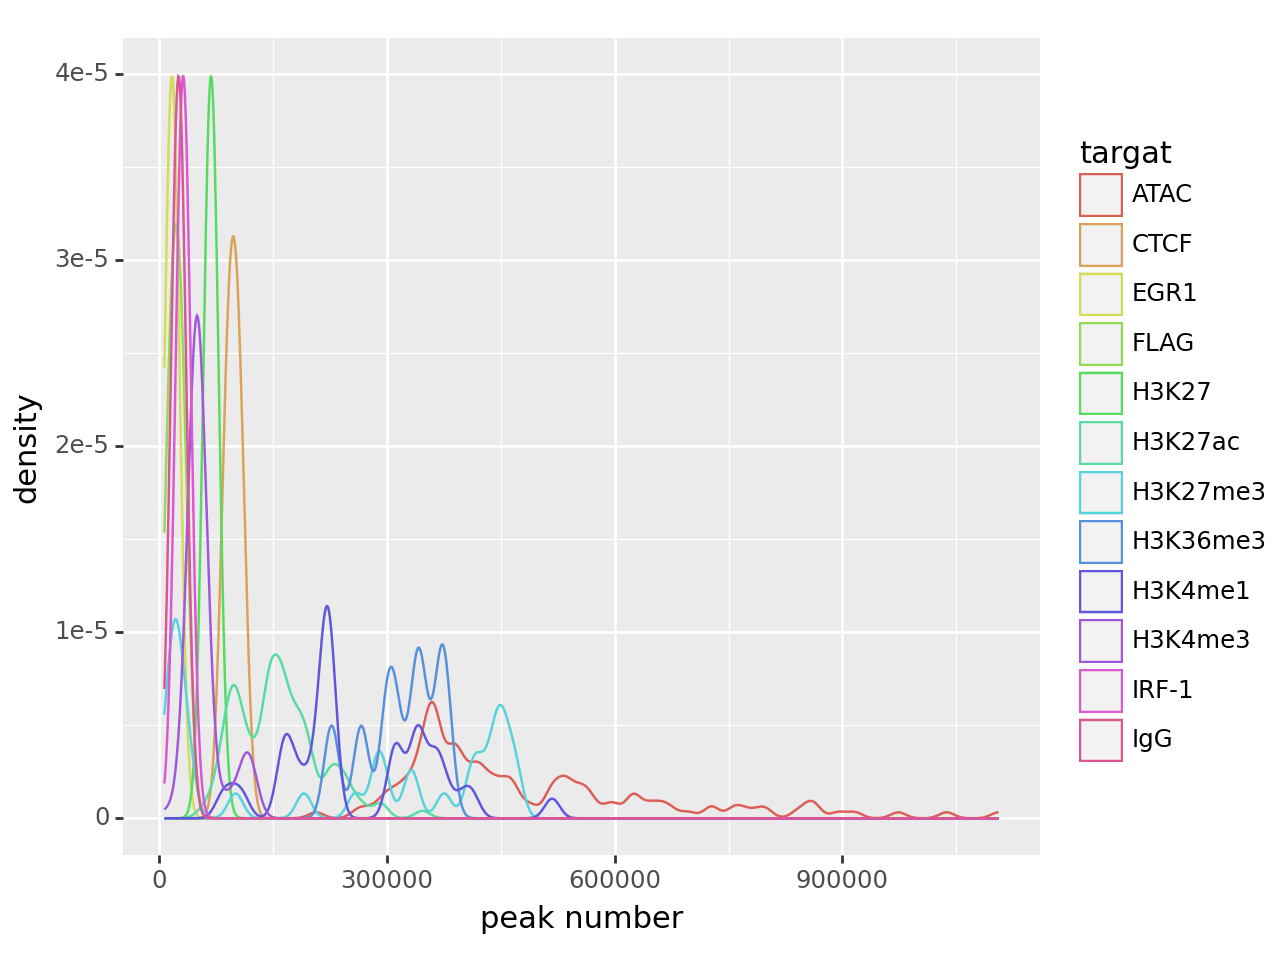

<Figure Size: (640 x 480)>

In [99]:
import plotnine as p9
p9.ggplot(sample_meta, p9.aes(x = "peak number", color = "targat")) + p9.geom_density(fill = None, bw=10000) # + p9.scale_x_log10()